# WhatsApp Chat Analysis

You can use your WhatsApp data for many data science tasks like sentiment analysis, keyword extraction, named entity recognition, text analysis and several other natural language processing tasks. It also depends on who you are analyzing your WhatsApp messages with because you can find a lot of information from your WhatsApp messages which can also help you to solve business problems.

Before starting with the task of WhatsApp Chat analysis with Python you need to extract your WhatsApp data from your smartphone which is a very easy task. To extract your WhatsApp chats, just open any chat with a person or a group and follow the steps mentioned below:

If you are having an iPhone then tap on the Contact Name or the Group Name. In case you are having an Android smartphone then tap on the 3 dots above.
- Then scroll to the bottom and top on Export Chat.
- Then select without media for simplicity if it asks you whether you want your chats with or without media.
- Then email this chat to yourself and download it to your system.
So this is how you can easily get your WhatsApp chats with any person or a group for the task of WhatsApp chat analysis.

In [30]:
#to install the 'emoji' module.

!pip install emoji

In [31]:
import regex as re
import pandas as pd
import numpy as np
import emoji
import plotly.express as px
from collections import Counter
import matplotlib.pyplot as plt
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
# % matplotlib inline


In [32]:
def startsWithDateAndTime(s):
    pattern = r"[\d]{1,2}/[\d]{1,2}/[\d]{4}" #, r"([0-9]+):([0-9]+)[ ]?(AM|PM|am|pm)? -" # [\d]{1,2}/[\d]{1,2}/[\d]{4} ^([0-9]+)(\/)([0-9]+)(\/)([0-9]+)
    result = re.findall(pattern, s)
    print("result :", result)
    if result:
        return True
    else:
        False



In [33]:
def FindAuthor(s):
    s=s.split(":")
    if len(s)==2:
        return True
    else:
        return False

In [34]:
text = "15/08/20, 11:34 - Ruzaan: Which I don't like"

In [35]:
def getDataPoint(line):
    splitLine = line.split(' - ')
    dateTime = splitLine[0]
    date, time = dateTime.split(', ')
    message = ' '.join(splitLine[1:])
    if FindAuthor(message):
        splitMessage = message.split(': ')
        author = splitMessage[0]
        message = ' '.join(splitMessage[1:])
    else:
        author = None
    return date, time, author, message


In [36]:
d, t, a, m = getDataPoint(text)

print(d)
print(t)
print(a)
print(m)

15/08/20
11:34
Ruzaan
Which I don't like


In [37]:
from google.colab import files

# uploaded = files.upload()
parsedData = [] # List to keep track of data so it can be used by a Pandas dataframe
conversation = "/content/WhatsApp Chat with Ruzaan.txt" # path for the whatsapp text file
with open(conversation, encoding="utf-8") as fp:

    fp.readline() # Skipping first line of the file because contains information related to something about end-to-end encryption
    print("fp.readline() : \n", fp.readline())
    messageBuffer = []
    print("messageBuffer : \n", messageBuffer)
    date, time, author = None, None, None
    while True:
        line = fp.readline()
        if not line:
            break
        line = line.strip()
        print("line: \n", line)
        if startsWithDateAndTime(line):
            print("startsWithDateAndTime : \n", startsWithDateAndTime)
            if len(messageBuffer) > 0:
              parsedData.append([date, time, author, ' '.join(messageBuffer)])
            messageBuffer.clear()
            date, time, author, message = getDataPoint(line)
            messageBuffer.append(message)

        else:
            messageBuffer.append(line)


fp.readline() : 
 09/01/19, 11:53 - Devdatta: https://youtu.be/8X2xfwBP4uo

messageBuffer : 
 []
line: 
 25/01/19, 14:08 - Devdatta: <Media omitted>
result : []
line: 
 28/02/19, 13:30 - Ruzaan: Brooo
result : []
line: 
 28/02/19, 13:32 - Devdatta: https://1337x.to/torrent/3127884/Udemy-Statistics-for-Data-Science-and-Business-Analysis/
result : []
line: 
 19/03/19, 18:29 - Ruzaan: <Media omitted>
result : []
line: 
 19/03/19, 18:31 - Ruzaan: Download u torrent
result : []
line: 
 19/03/19, 18:31 - Ruzaan: I am ready
result : []
line: 
 19/03/19, 18:31 - Ruzaan: Missed voice call
result : []
line: 
 19/03/19, 18:38 - Devdatta: wait for 5 min
result : []
line: 
 19/03/19, 18:38 - Ruzaan: Okay
result : []
line: 
 19/03/19, 19:08 - Devdatta: laptop on hai
result : []
line: 
 19/03/19, 19:08 - Devdatta: ?
result : []
line: 
 19/03/19, 19:11 - Ruzaan: Yes
result : []
line: 
 19/03/19, 19:11 - Ruzaan: Ready
result : []
line: 
 19/03/19, 19:27 - Devdatta: done
result : []
line: 
 19/03/19, 19

In [38]:
df = pd.DataFrame(parsedData, columns=['Date', 'Time', 'Author', 'Message']) # Initialising a pandas Dataframe.
df["Date"] = pd.to_datetime(df["Date"])
df.tail(20)

,Date,Time,Author,Message


In [39]:
df.Author.unique()

array([], dtype=object)

In [41]:
import pandas as pd
import re
import emoji
import numpy as np
# Sample DataFrame creation (replace this with your actual DataFrame)
data = {'Message': ['Hello', '<Media omitted>', 'Check this out: https://example.com']}
df = pd.DataFrame (data)

# Counting media messages
media_messages = df [df ['Message'] == '<Media omitted>'].shape[0]

# Function to split and count emojis
def split_count(text):
  emoji_list = [emoji.demojize(e) for e in emoji.distinct_emoji_list(text)]
  return emoji_list

# Applying the function to count emojis
df["emoji"] = df ["Message"].apply(split_count)
emojis = sum(df['emoji'].str.len())

# Counting Links
URLPATTERN = r' (https?://\S+)'
df['urlcount'] = df.Message.apply(lambda x: re.findall (URLPATTERN, x)).str.len()
links = np.sum(df.urlcount)

# Printing results
print("Media:", media_messages)
print("Emojis:", emojis)
print("Links:", links)

Media: 1
Emojis: 0
Links: 1


In [44]:
import pandas as pd
import re
import emoji
import numpy as np

# Sample DataFrame creation (replace this with your actual DataFrame)
data = {'Message': ['Hello', '<Media omitted>', 'Check this out: https://example.com'],
        'Author': ['User1', 'User2', 'User3']} # Adding an 'Author' column to the sample data
df = pd.DataFrame(data)

# Counting media messages
media_messages = df[df['Message'] == '<Media omitted>'].shape[0]

# Function to split and count emojis
def split_count(text):
  emoji_list = [emoji.demojize(e) for e in emoji.distinct_emoji_list(text)]
  return emoji_list

# Applying the function to count emojis
df["emoji"] = df["Message"].apply(split_count)
emojis = sum(df['emoji'].str.len())

# Counting Links
URLPATTERN = r' (https?://\S+)'
df['urlcount'] = df.Message.apply(lambda x: re.findall(URLPATTERN, x)).str.len()
links = np.sum(df.urlcount)

# Printing results
print("Media:", media_messages)
print("Emojis:", emojis)
print("Links:", links)

media_messages_df = df[df['Message'] == '<Media omitted>']
messages_df = df.drop(media_messages_df.index)
messages_df.info()
messages_df['Letter_Count'] = messages_df['Message'].apply(lambda s : len(s))
messages_df['Word_Count'] = messages_df['Message'].apply(lambda s : len(s.split(' ')))
messages_df["MessageCount"]=1

l = ['User1', 'User2', 'User3'] # list of the authors name in the group, modified to match the sample data

for i in range(len(l)):
    # Filtering out messages of particular user
    req_df= messages_df[messages_df["Author"] == l[i]] # Now this line should work as 'Author' column is present.
    # req_df will contain messages of only one particular user
    print('\n')
    print(f'Stats of {l[i]} -')
    # shape will print number of rows which indirectly means the number of messages
    print('Messages Sent', req_df.shape[0])
    #Word_Count contains of total words in one message. Sum of all words/ Total Messages will yield words per message
    words_per_message = (np.sum(req_df['Word_Count']))/req_df.shape[0]
    print('Words per message', words_per_message)
    #media conists of media messages
    media = media_messages_df[media_messages_df['Author'] == l[i]].shape[0]
    print('Media Messages Sent', media)
    # emojis conists of total emojis
    emojis = sum(req_df['emoji'].str.len())
    print('Emojis Sent', emojis)
    #links consist of total links
    links = sum(req_df["urlcount"])
    print('Links Sent', links)
    # print('\n')

Media: 1
Emojis: 0
Links: 1
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 2
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Message   2 non-null      object
 1   Author    2 non-null      object
 2   emoji     2 non-null      object
 3   urlcount  2 non-null      int64 
dtypes: int64(1), object(3)
memory usage: 192.0+ bytes


Stats of User1 -
Messages Sent 1
Words per message 1.0
Media Messages Sent 0
Emojis Sent 0
Links Sent 0


Stats of User2 -
Messages Sent 0
Words per message nan
Media Messages Sent 1
Emojis Sent 0
Links Sent 0


Stats of User3 -
Messages Sent 1
Words per message 4.0
Media Messages Sent 0
Emojis Sent 0
Links Sent 1


<ipython-input-44-da315671c2e5>:51: RuntimeWarning: invalid value encountered in scalar divide
  words_per_message = (np.sum(req_df['Word_Count']))/req_df.shape[0]


In [45]:
total_emojis_list = list([a for b in messages_df.emoji for a in b])
emoji_dict = dict(Counter(total_emojis_list))
emoji_dict = sorted(emoji_dict.items(), key=lambda x: x[1], reverse=True)
for i in emoji_dict:
    print(i)

There are 41 words in all the messages.


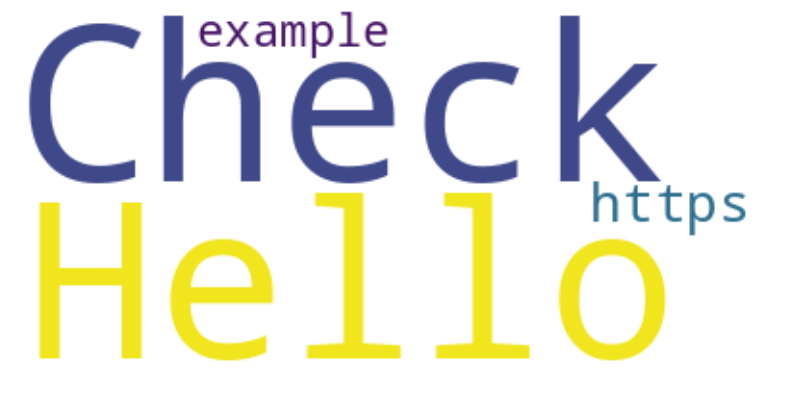

In [48]:
text = " ".join(review for review in messages_df.Message)
print ("There are {} words in all the messages.".format(len(text)))
stopwords = set(STOPWORDS)
# Generate a word cloud image
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
# Display the generated image:
# the matplotlib way:
plt.figure( figsize=(10,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

Author name User1


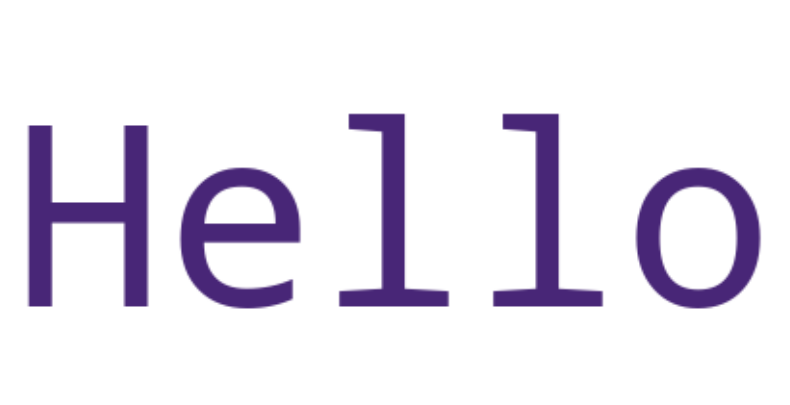

No messages found for author: User2
Author name User3


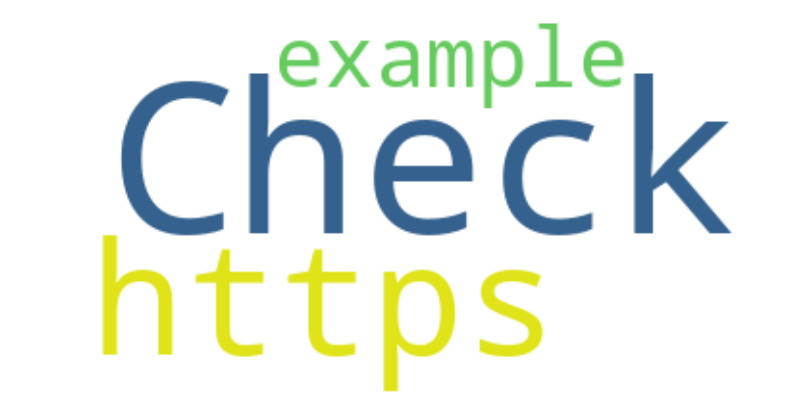

In [50]:
l = ['User1', 'User2', 'User3'] # Use actual authors from your DataFrame
for i in range(len(l)):
    dummy_df = messages_df[messages_df['Author'] == l[i]]
    text = " ".join(review for review in dummy_df.Message)
    stopwords = set(STOPWORDS)

    # Check if text is empty before generating wordcloud
    if text:
        print('Author name',l[i])
        wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
        plt.figure( figsize=(10,5))
        plt.imshow(wordcloud, interpolation='bilinear')
        plt.axis("off")
        plt.show()
    else:
        print(f"No messages found for author: {l[i]}")